# Exploratory Data Analysis

## 1. Import Libraries and Settings

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 140)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load the RFM Data

In [138]:
# Load the RFM data created in notebook 1
rfm = pd.read_csv("../data/OnlineRetail_RFM_Data.csv")
print(f"Dataset shape: {rfm.shape}")
rfm.head()

Dataset shape: (4338, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


## 3. Basic Data Quality Checks

### 3.1 Data Types and Missing Values

In [139]:
# Check data types
print("Data Types:")
print(rfm.dtypes)
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing Values:")
print(rfm.isnull().sum())
print("\n" + "="*50 + "\n")

# Basic statistics
print("Basic Info:")
rfm.info()

Data Types:
CustomerID    float64
Recency         int64
Frequency       int64
Monetary      float64
dtype: object


Missing Values:
CustomerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   float64
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


### 3.2 Descriptive Statistics

In [140]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2048.688081
std,1721.808492,100.014169,7.697998,8985.230220
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,306.482500
50%,15299.500000,51.000000,2.000000,668.570000
75%,16778.750000,142.000000,5.000000,1660.597500
max,18287.000000,374.000000,209.000000,280206.020000


In [141]:
percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

percentile_table = pd.DataFrame({
    col: rfm[col].quantile(percentiles)
    for col in ['Recency', 'Frequency', 'Monetary']
})

percentile_table.index.name = "Percentile"
percentile_table

,Recency,Frequency,Monetary
Percentile,,,
0.01,1.0,1.0,52.2000
0.05,3.0,1.0,112.0200
0.10,5.0,1.0,155.2960
0.25,18.0,1.0,306.4825
0.50,51.0,2.0,668.5700
0.75,142.0,5.0,1660.5975
0.90,263.0,9.0,3640.8410
0.95,312.0,13.0,5789.9995
0.99,369.0,30.0,19780.4878


## 4. Univariate Analysis

### 4.1 Distribution of Recency

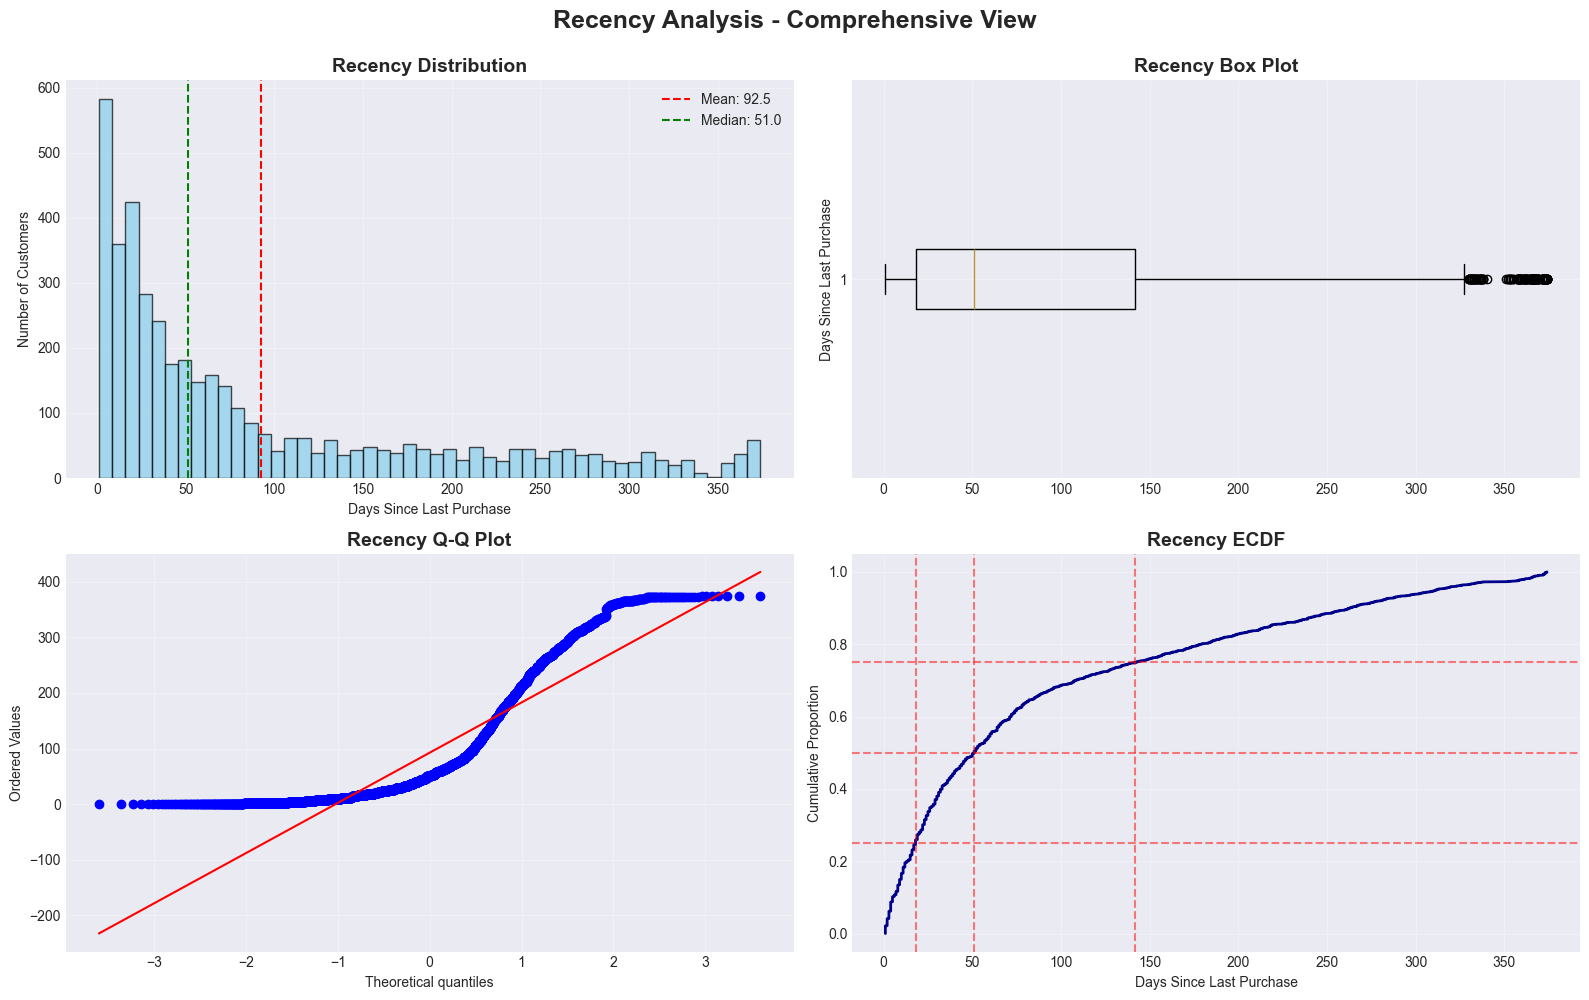


Recency Statistics:
Skewness: 1.246
Kurtosis: 0.431


In [142]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Recency Analysis - Comprehensive View', fontsize=18, fontweight='bold', y=0.995)

# Histogram
axes[0, 0].hist(rfm['Recency'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Recency Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Days Since Last Purchase')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].axvline(rfm['Recency'].mean(), color='red', linestyle='--', label=f'Mean: {rfm["Recency"].mean():.1f}')
axes[0, 0].axvline(rfm['Recency'].median(), color='green', linestyle='--', label=f'Median: {rfm["Recency"].median():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Boxplot
axes[0, 1].boxplot(rfm['Recency'], vert=False)
axes[0, 1].set_title('Recency Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Days Since Last Purchase')
axes[0, 1].grid(alpha=0.3)

# Q-Q Plot
stats.probplot(rfm['Recency'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Recency Q-Q Plot', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# ECDF Plot
sorted_data = np.sort(rfm['Recency'])
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].plot(sorted_data, y, linewidth=2, color='darkblue')
axes[1, 1].set_title('Recency ECDF', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Days Since Last Purchase')
axes[1, 1].set_ylabel('Cumulative Proportion')
axes[1, 1].grid(alpha=0.3)

# Reference lines for quartiles
for q, label in [(0.25, 'Q1'), (0.5, 'Median'), (0.75, 'Q3')]:
    value = np.percentile(rfm['Recency'], q*100)
    axes[1, 1].axhline(q, color='red', linestyle='--', alpha=0.5)
    axes[1, 1].axvline(value, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Skewness and Kurtosis
print(f"\nRecency Statistics:")
print(f"Skewness: {rfm['Recency'].skew():.3f}")
print(f"Kurtosis: {rfm['Recency'].kurtosis():.3f}")

### 4.2 Distribution of Frequency

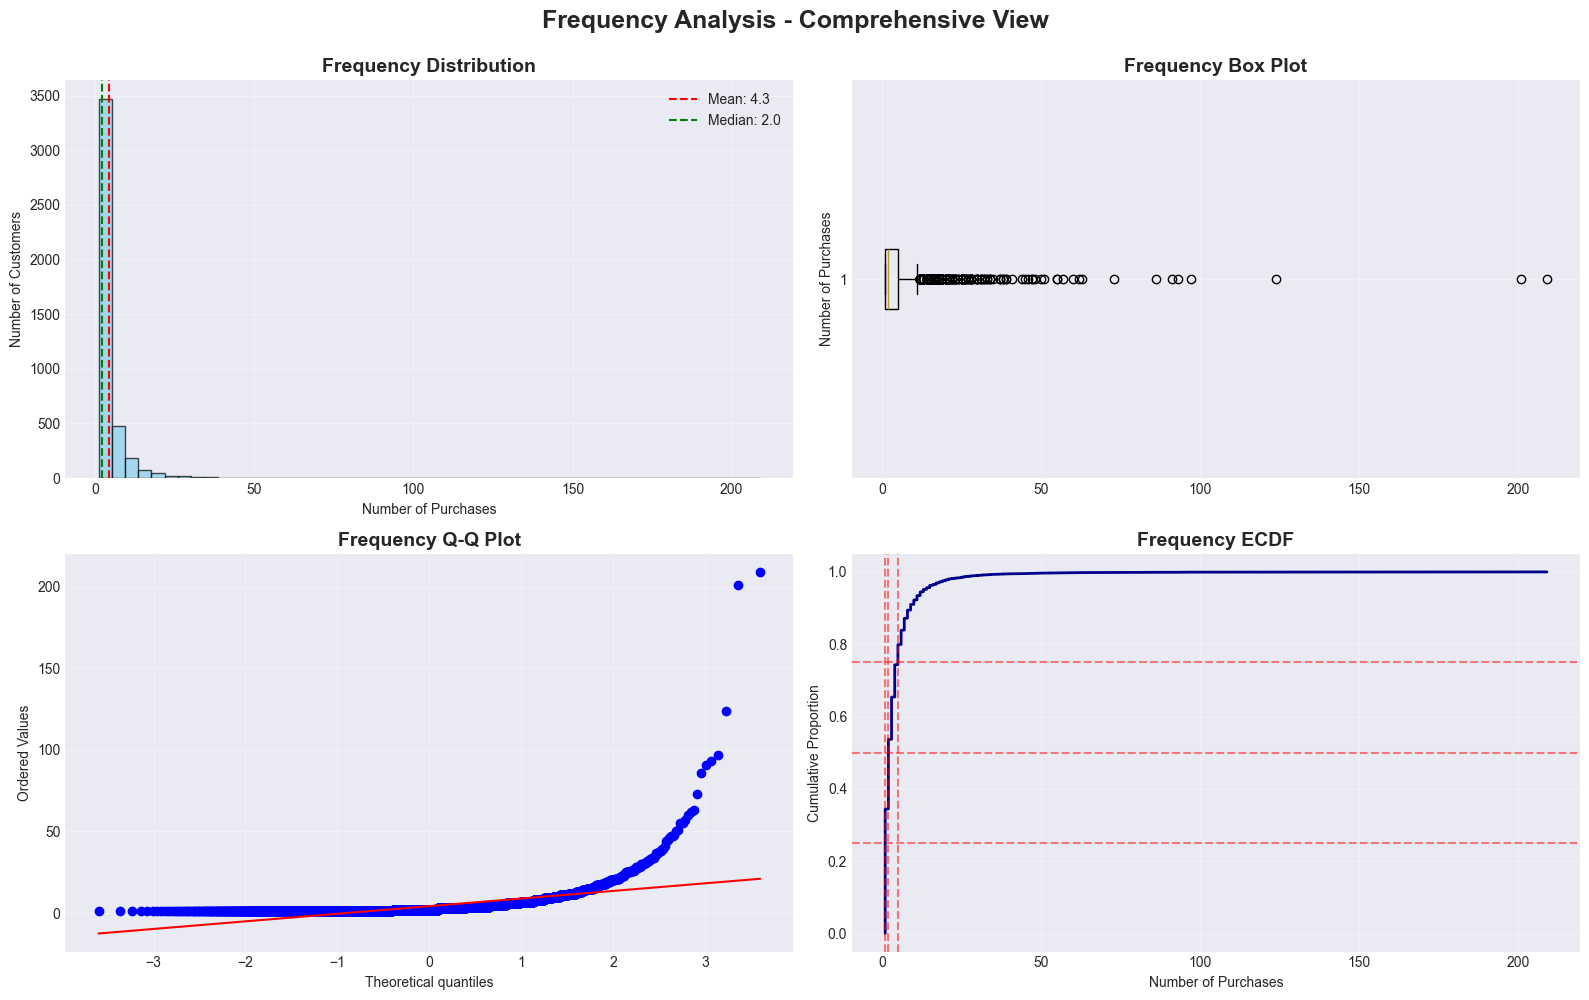


Frequency Statistics:
Skewness: 12.067
Kurtosis: 249.058


In [143]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Frequency Analysis - Comprehensive View', fontsize=18, fontweight='bold', y=0.995)

# Histogram
axes[0, 0].hist(rfm['Frequency'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Frequency Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Purchases')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].axvline(rfm['Frequency'].mean(), color='red', linestyle='--', label=f'Mean: {rfm["Frequency"].mean():.1f}')
axes[0, 0].axvline(rfm['Frequency'].median(), color='green', linestyle='--', label=f'Median: {rfm["Frequency"].median():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3) 

# Boxplot
axes[0, 1].boxplot(rfm['Frequency'], vert=False)
axes[0, 1].set_title('Frequency Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Number of Purchases')
axes[0, 1].grid(alpha=0.3)

# Q-Q Plot
stats.probplot(rfm['Frequency'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Frequency Q-Q Plot', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# ECDF Plot
sorted_data = np.sort(rfm['Frequency'])
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].plot(sorted_data, y, linewidth=2, color='darkblue')
axes[1, 1].set_title('Frequency ECDF', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Purchases')
axes[1, 1].set_ylabel('Cumulative Proportion')
axes[1, 1].grid(alpha=0.3)

# Reference lines for quartiles
for q, label in [(0.25, 'Q1'), (0.5, 'Median'), (0.75, 'Q3')]:
    value = np.percentile(rfm['Frequency'], q*100)
    axes[1, 1].axhline(q, color='red', linestyle='--', alpha=0.5)
    axes[1, 1].axvline(value, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Skewness and Kurtosis
print(f"\nFrequency Statistics:")
print(f"Skewness: {rfm['Frequency'].skew():.3f}")
print(f"Kurtosis: {rfm['Frequency'].kurtosis():.3f}")

### 4.3 Distribution of Monetary

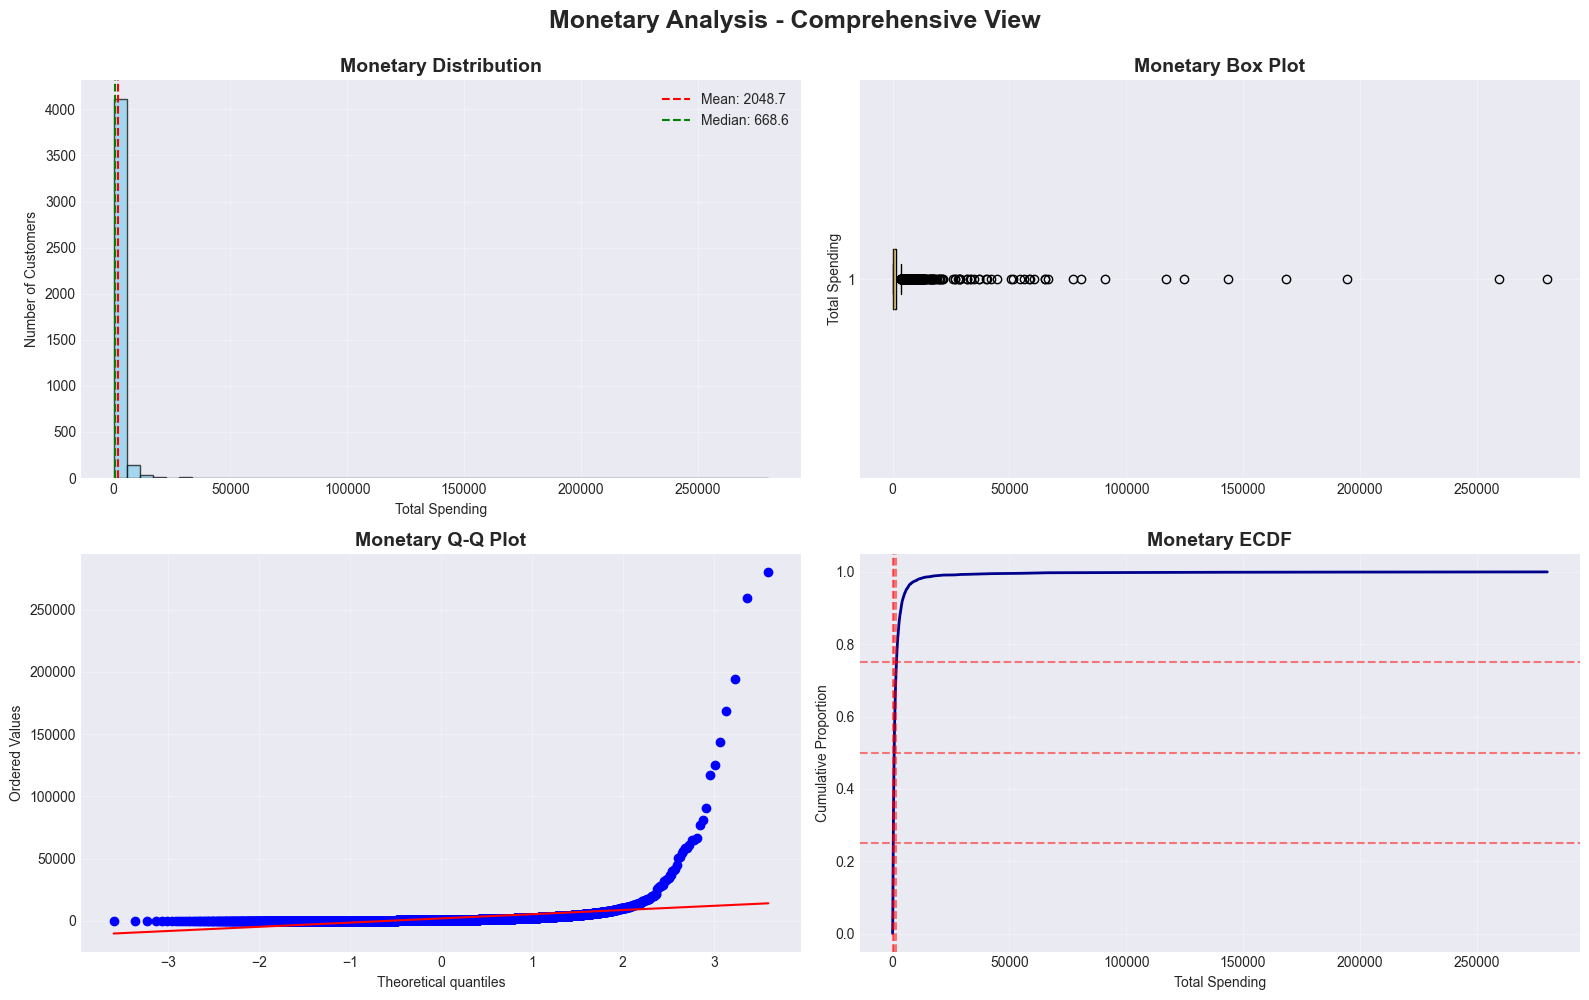


Monetary Statistics:
Skewness: 19.339
Kurtosis: 478.684


In [144]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Monetary Analysis - Comprehensive View', fontsize=18, fontweight='bold', y=0.995)

# Histogram
axes[0, 0].hist(rfm['Monetary'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Monetary Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Total Spending')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].axvline(rfm['Monetary'].mean(), color='red', linestyle='--', label=f'Mean: {rfm["Monetary"].mean():.1f}')
axes[0, 0].axvline(rfm['Monetary'].median(), color='green', linestyle='--', label=f'Median: {rfm["Monetary"].median():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3) 

# Boxplot
axes[0, 1].boxplot(rfm['Monetary'], vert=False)
axes[0, 1].set_title('Monetary Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Total Spending')
axes[0, 1].grid(alpha=0.3)

# Q-Q Plot
stats.probplot(rfm['Monetary'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Monetary Q-Q Plot', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# ECDF Plot
sorted_data = np.sort(rfm['Monetary'])
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].plot(sorted_data, y, linewidth=2, color='darkblue')
axes[1, 1].set_title('Monetary ECDF', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Total Spending')
axes[1, 1].set_ylabel('Cumulative Proportion')
axes[1, 1].grid(alpha=0.3)

# Reference lines for quartiles
for q, label in [(0.25, 'Q1'), (0.5, 'Median'), (0.75, 'Q3')]:
    value = np.percentile(rfm['Monetary'], q*100)
    axes[1, 1].axhline(q, color='red', linestyle='--', alpha=0.5)
    axes[1, 1].axvline(value, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Skewness and Kurtosis
print(f"\nMonetary Statistics:")
print(f"Skewness: {rfm['Monetary'].skew():.3f}")
print(f"Kurtosis: {rfm['Monetary'].kurtosis():.3f}")

## 5. Outlier Detection

### 5.1 IQR Method

In [145]:
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return {
        "Feature": column,
        "Lower_Bound": lower_bound,
        "Upper_Bound": upper_bound,
        "Outlier_Count": len(outliers),
        "Outlier_%": (len(outliers) / len(df)) * 100,
        "Min_Outlier": outliers[column].min() if len(outliers) > 0 else np.nan,
        "Max_Outlier": outliers[column].max() if len(outliers) > 0 else np.nan
    }

# Build table
results = []

for col in ['Recency', 'Frequency', 'Monetary']:
    results.append(identify_outliers_iqr(rfm, col))

outlier_table = pd.DataFrame(results)

# Format nicely
outlier_table = outlier_table.round({
    "Lower_Bound": 2,
    "Upper_Bound": 2,
    "Outlier_%": 2,
    "Min_Outlier": 2,
    "Max_Outlier": 2
})

outlier_table


,Feature,Lower_Bound,Upper_Bound,Outlier_Count,Outlier_%,Min_Outlier,Max_Outlier
0,Recency,-168.00,328.00,155,3.57,330.00,374.00
1,Frequency,-5.00,11.00,285,6.57,12.00,209.00
2,Monetary,-1724.69,3691.77,425,9.80,3692.28,280206.02


### 5.2 Visualize Outliers

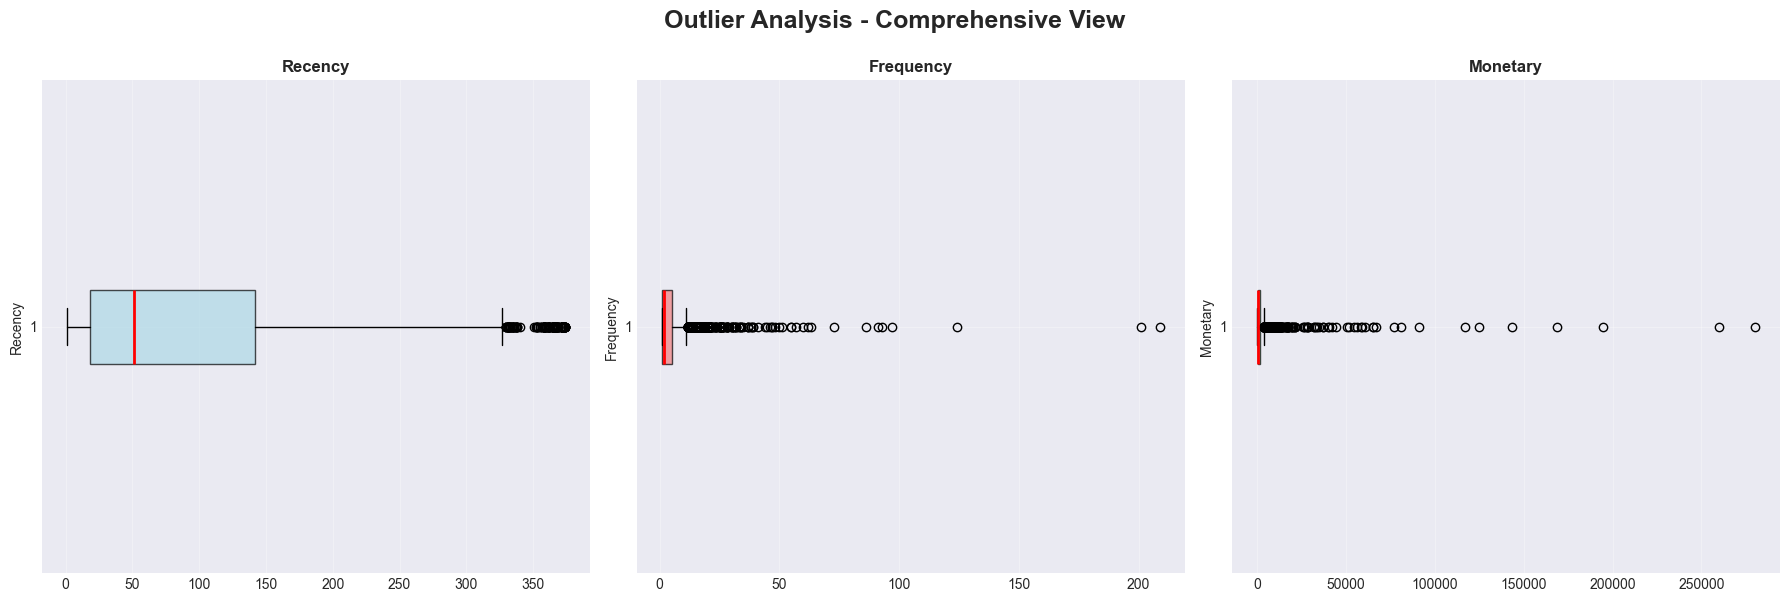

In [146]:
# Create box plots for all three features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Outlier Analysis - Comprehensive View', fontsize=18, fontweight='bold', y=0.995)

features = ['Recency', 'Frequency', 'Monetary']
colors = ['lightblue', 'lightcoral', 'lightgreen']

for idx, (feature, color) in enumerate(zip(features, colors)):
    bp = axes[idx].boxplot(rfm[feature], vert=False, patch_artist=True,
                           boxprops=dict(facecolor=color, alpha=0.7),
                           medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Bivariate Analysis
### 6.1 Correlation Matrix

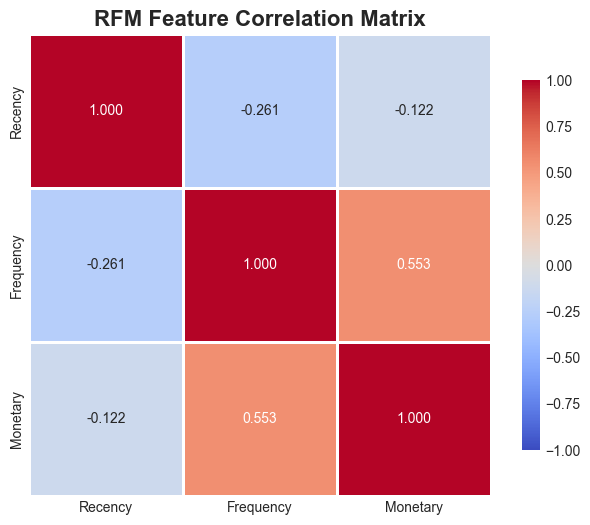

In [147]:
# correlation matrix
correlation_matrix = rfm.iloc[:,1:4].corr()

# visualize
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('RFM Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.show() 

### 6.2 Scatter Plot Matrix (Pairplot)

Text(0.5, 1.02, 'RFM Feature Pairwise Relationships')

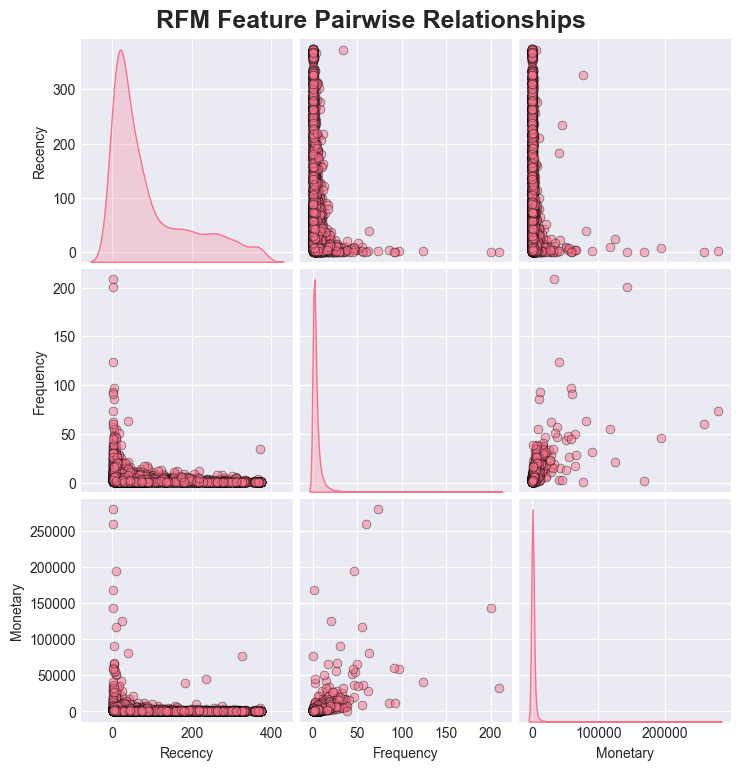

In [148]:
sns.pairplot(rfm.iloc[:,1:4], 
             diag_kind='kde', 
             plot_kws={'alpha':0.5, 's':40, 'edgecolor':'k'}, 
             diag_kws={'shade':True})

plt.suptitle('RFM Feature Pairwise Relationships', fontsize=18, fontweight='bold', y=1.02)

### 6.3 Individual Scatter Plots with Regression Lines

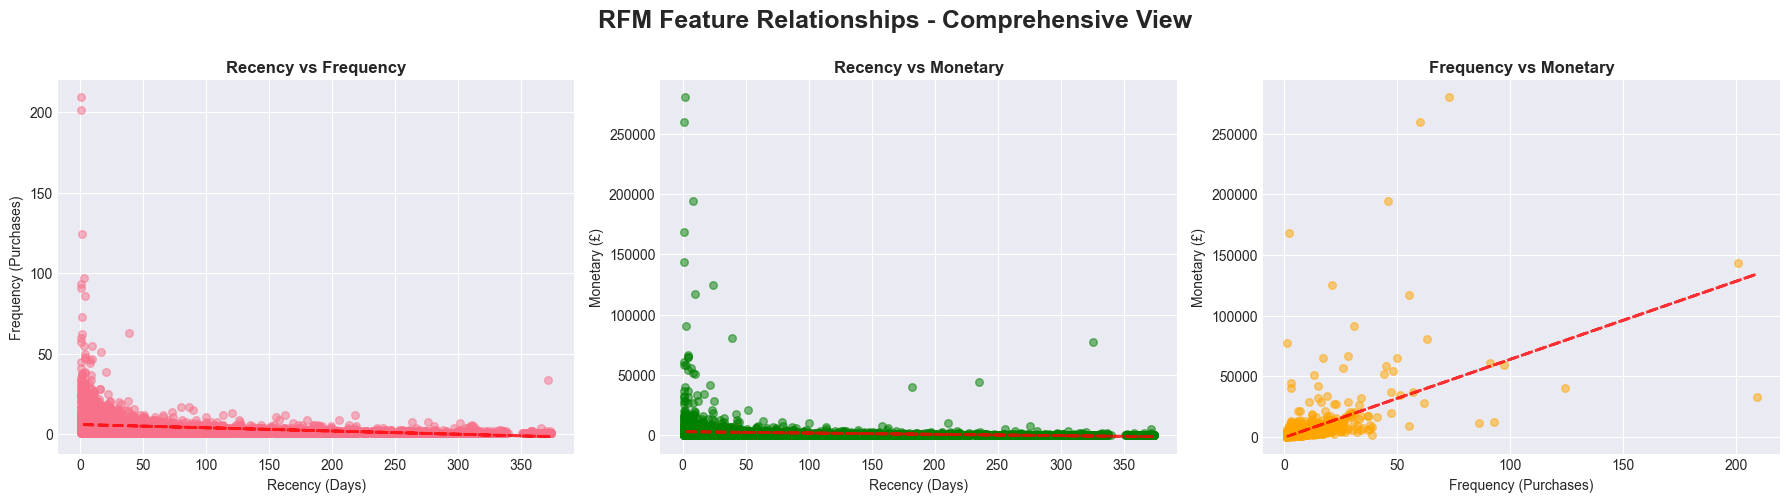

In [149]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('RFM Feature Relationships - Comprehensive View', fontsize=18, fontweight='bold', y=0.995)

# Recency vs Frequency
axes[0].scatter(rfm['Recency'], rfm['Frequency'], alpha=0.5, s=30)
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Frequency (Purchases)')
axes[0].set_title('Recency vs Frequency', fontweight='bold')
z = np.polyfit(rfm['Recency'], rfm['Frequency'], 1)
p = np.poly1d(z)
axes[0].plot(rfm['Recency'], p(rfm['Recency']), "r--", alpha=0.8, linewidth=2)

# Recency vs Monetary
axes[1].scatter(rfm['Recency'], rfm['Monetary'], alpha=0.5, s=30, color='green')
axes[1].set_xlabel('Recency (Days)')
axes[1].set_ylabel('Monetary (£)')
axes[1].set_title('Recency vs Monetary', fontweight='bold')
z = np.polyfit(rfm['Recency'], rfm['Monetary'], 1)
p = np.poly1d(z)
axes[1].plot(rfm['Recency'], p(rfm['Recency']), "r--", alpha=0.8, linewidth=2)

# Frequency vs Monetary
axes[2].scatter(rfm['Frequency'], rfm['Monetary'], alpha=0.5, s=30, color='orange')
axes[2].set_xlabel('Frequency (Purchases)')
axes[2].set_ylabel('Monetary (£)')
axes[2].set_title('Frequency vs Monetary', fontweight='bold')
z = np.polyfit(rfm['Frequency'], rfm['Monetary'], 1)
p = np.poly1d(z)
axes[2].plot(rfm['Frequency'], p(rfm['Frequency']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

## 7. Customer Segment Preview by Quartile-Based

### 7.1 Create RFM Scores Using Quartiles

In [150]:
rfm_score = rfm.copy()

# Create RFM scores (1-4 where 4 is best)
# For recency: lower is better, so labels are reverse
rfm_score['R_score'] = pd.qcut(rfm_score['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_score['F_score'] = pd.qcut(rfm_score['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
rfm_score['M_score'] = pd.qcut(rfm_score['Monetary'].rank(method='first'), q=4, labels=[1, 2, 3, 4])

rfm_score['R_score'] = rfm_score['R_score'].astype(int)
rfm_score['F_score'] = rfm_score['F_score'].astype(int)
rfm_score['M_score'] = rfm_score['M_score'].astype(int)

# Combine RFM score
rfm_score['RFM_Score'] = rfm_score['R_score'] + rfm_score['F_score'] + rfm_score['M_score']

print("RFM Score Distribution:")
print(rfm_score['RFM_Score'].value_counts().sort_index())

RFM Score Distribution:
RFM_Score
3     300
4     506
5     485
6     504
7     431
8     435
9     410
10    391
11    387
12    489
Name: count, dtype: int64


### 7.2 Manual Customer Segmentation

In [151]:
# Define segment labels based on RFM score
def segment_customers(row):
    if row['RFM_Score'] >= 10:
        return 'Champions'
    elif row['RFM_Score'] >= 8:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 6:
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= 5 and row['R_score'] >= 3:
        return 'Recent Customers'
    elif row['RFM_Score'] >= 5:
        return 'At Risk'
    else:
        return 'Lost'

rfm_score['Segment'] = rfm_score.apply(segment_customers, axis=1)

In [152]:
segment_counts = rfm_score['Segment'].value_counts()

segment_table = pd.DataFrame({
    "Customer_Count": segment_counts,
    "Percentage": (segment_counts / len(rfm_score)) * 100
})

segment_table["Percentage"] = segment_table["Percentage"].round(2)

segment_table


,Customer_Count,Percentage
Segment,,
Champions,1267,29.21
Potential Loyalists,935,21.55
Loyal Customers,845,19.48
Lost,806,18.58
At Risk,387,8.92
Recent Customers,98,2.26


### 7.3 Visualize Segment Distribution

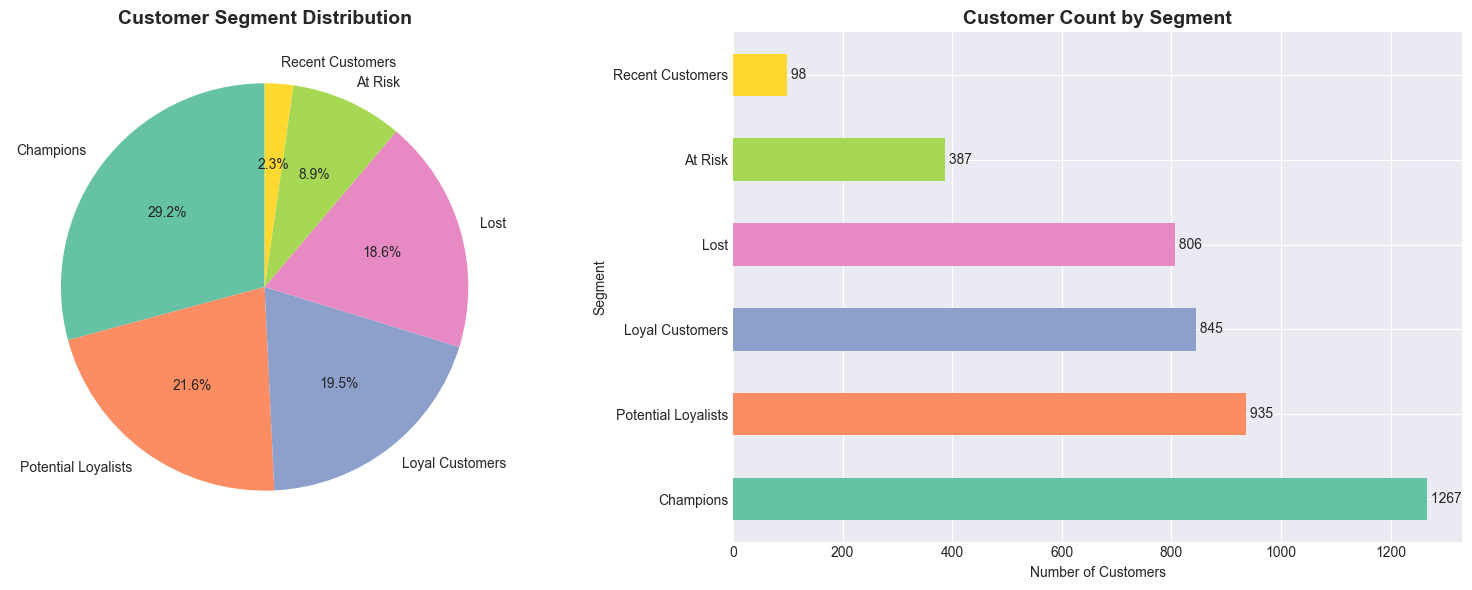

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
segment_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90,
                    colors=sns.color_palette('Set2'))
axes[0].set_title('Customer Segment Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Bar chart
segment_counts.plot(kind='barh', ax=axes[1], color=sns.color_palette('Set2'))
axes[1].set_title('Customer Count by Segment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Customers')
axes[1].set_ylabel('Segment')

# Add value labels on bars
for i, v in enumerate(segment_counts.values):
    axes[1].text(v, i, f' {v}', va='center')

plt.tight_layout()
plt.show()

### 7.4 Segment Characteristics


Segment Characteristics:
                     Avg_Recency  Avg_Frequency  Avg_Monetary  Customer_Count
Segment                                                                      
Champions                  19.92           9.92       5388.50            1267
Potential Loyalists        87.29           1.86        695.75             935
Loyal Customers            52.46           3.23       1244.50             845
Lost                      229.60           1.06        221.53             806
At Risk                   160.17           1.39        419.62             387
Recent Customers           32.66           1.00        172.45              98


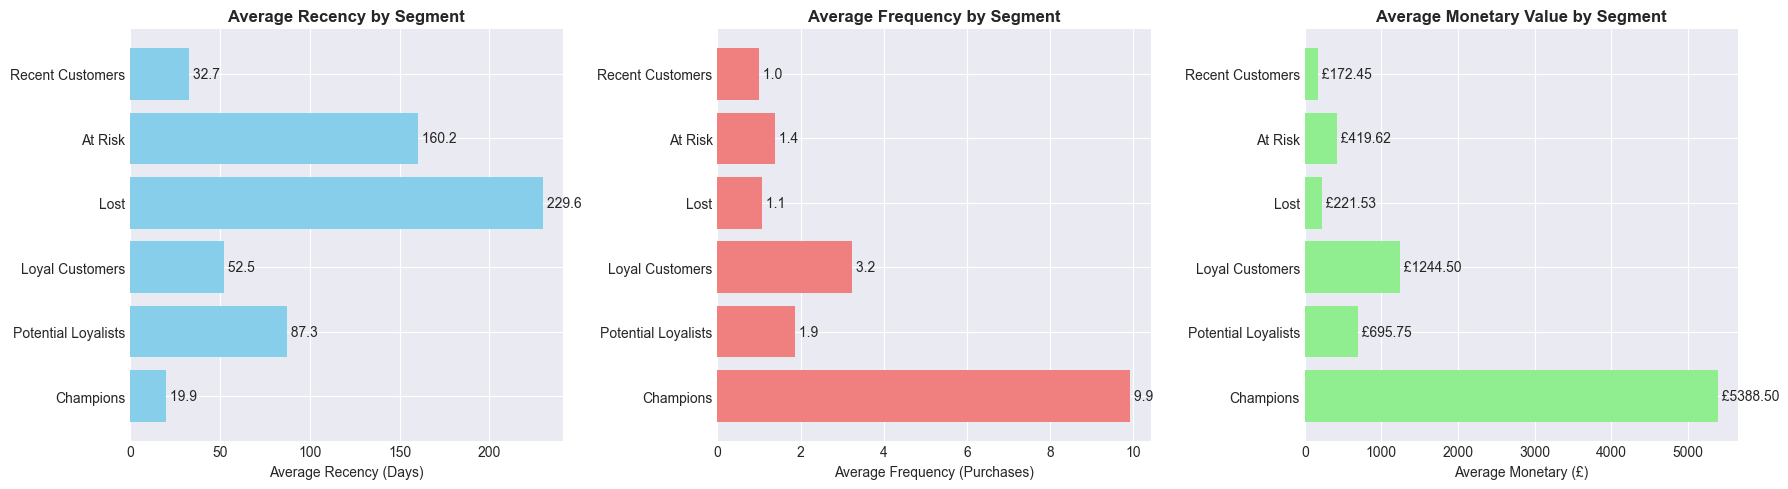

In [154]:
# Calculate average RFM values for each segment
segment_summary = rfm_score.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).round(2)

segment_summary.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']
segment_summary = segment_summary.sort_values('Customer_Count', ascending=False)

print("\nSegment Characteristics:")
print("="*80)
print(segment_summary)

# Visualize segment characteristics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

segments = segment_summary.index

# Recency by Segment
axes[0].barh(segments, segment_summary['Avg_Recency'], color='skyblue')
axes[0].set_xlabel('Average Recency (Days)')
axes[0].set_title('Average Recency by Segment', fontweight='bold')
for i, v in enumerate(segment_summary['Avg_Recency']):
    axes[0].text(v, i, f' {v:.1f}', va='center')

# Frequency by Segment
axes[1].barh(segments, segment_summary['Avg_Frequency'], color='lightcoral')
axes[1].set_xlabel('Average Frequency (Purchases)')
axes[1].set_title('Average Frequency by Segment', fontweight='bold')
for i, v in enumerate(segment_summary['Avg_Frequency']):
    axes[1].text(v, i, f' {v:.1f}', va='center')

# Monetary by Segment
axes[2].barh(segments, segment_summary['Avg_Monetary'], color='lightgreen')
axes[2].set_xlabel('Average Monetary (£)')
axes[2].set_title('Average Monetary Value by Segment', fontweight='bold')
for i, v in enumerate(segment_summary['Avg_Monetary']):
    axes[2].text(v, i, f' £{v:.2f}', va='center')

plt.tight_layout()
plt.show()